In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train_clean.csv")
test = pd.read_csv("test_clean.csv")
train['comment_text'] = train['comment_text'].apply(lambda x: str(x))
test['comment_text']= test['comment_text'].apply(lambda x: str(x))

In [3]:
test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,sources zawe ashton lapland
3,00017563c3f7919a,look back source information updated correct f...
4,00017695ad8997eb,anonymously edit articles


In [4]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

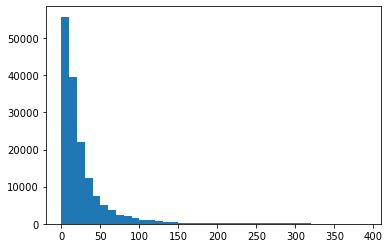

In [6]:
import matplotlib.pyplot as plt

numofwords_persen = [len(x) for x in list_tokenized_train]
plt.hist(numofwords_persen,bins = np.arange(0,400,10))
plt.show()

In [7]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [8]:
np.savetxt('train_text.csv', X_t, delimiter = ',')
np.savetxt('test_text.csv', X_te, delimiter = ',')

In [ ]:
from langdetect import detect

def somefunc(x):
    try:
        return detect(x)
    except:
        return ""
    
train_lang = [train['comment_text'].apply(lambda x: somefunc(x) if x.strip() != "" else "")]
test_lang = [test['comment_text'].apply(lambda x: somefunc(x) if x.strip() != "" else "")]